# Clusterización de objetos segmentados en una imagen

 ## **Hackaton RIIAA 2021 Reto 1**  
 Mejora de calidad de la imagen y clasificación  
 **Equipo:** Pista latente ML  
 **Integrantes:**  
       - Andrea Berenice Ek Hobak  
       - Gabriela Marali Mundo Cortes  
       - Mario Xavier Canche Uc  
       - Myrna Citlali Castillo Silva  
       - Ramon Sidonio Aparicio Garcia 

## Montamos carpeta en Drive

In [ ]:
# Montamos el Drive al Notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Verificamos el directorio en el que nos encontramos
!pwd
!ls

/content
drive  sample_data


In [ ]:
# Cambiamos de directorio al Drive
import os
os.chdir("drive/My Drive/Hackaton2021/codigo/Prueba_segmentationTextRecognition/")
!ls

 Andrea.ipynb
 Andreaoutput_fichero_manual_op2.csv
 Andreaoutput_fichero_manual_op2.gsheet
'Andrea Test.ipynb'
 AndreaTextRecognition3.py
'Andrea TextRecognition_Interactive.ipynb'
 clustering_vgg16_2.ipynb
 clustering_vgg16.ipynb
'Copia de Copia de Test.ipynb'
'Copia de Copia de Test Reto1-Andrea.ipynb'
'Copia de Copia de Test Reto1.ipynb'
'Copia de Copia de Test Reto1-Marali.ipynb'
'Copia de Copia de Test Reto1-Xavi.ipynb'
'Copia de output_features1_expedientes.csv'
'Copia de Test.ipynb'
'Copia de Test Reto1.ipynb'
'Copia de TextRecognition_Interactive2.ipynb'
'Copia de TextRecognition_Interactive.ipynb'
 eng.traineddata
 FeatureRegions1.py
 FeatureRegions2.py
 find_contours.py
 output_features1_expedientes.csv
 output_features2_expedientes300.csv
 output_features2_expedientes700.csv
 output_features2_expedientes.csv
 output_fichero_manual.csv
 output_fichero_manual_op2.csv
 Pruebas.ipynb
 __pycache__
 Recortes
 resized_image.png
 rotated_image.png
 SalidasAndrea
 Sementation_obj_Int

## Instalamos las librerias

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 13.3 MB/s 
     |████████████████████████████████| 23.1 MB 83.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Descargamos y copiamos el BEST MODEL LSTM

## Cargamos las librerias

In [ ]:
# Cargamos las librerias
from PIL import Image
import PIL.Image

import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy import ndimage
from skimage.measure import regionprops
import re

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

## Cargamos la imagen del documento

In [ ]:
# Ruta de la imagen
archivo_scr = "../pruebas/images_texto/DFS_Exp._009-011-014,_L-1-5-.JPG.png"
#archivo_scr = "../pruebas/images_texto/DFS,_Exp._012-011-025,_L-1-80-06-03_a_85-12-01-7-.JPG.png"
#archivo_scr = "../pruebas/images_texto/DFS_Exp._009-011-014,_L-1-79-07-25_a_83-10-16-259-.JPG.png"
#archivo_scr = "../pruebas/images_texto/DFS_012-028-002,_L-2-79-10-11_a_80-01-25-317-.JPG.png"

# Ruta de imagenes del hackaton
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-056.jpg"
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-021.jpg"
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-002.jpg"
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-206.jpg"
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-143.jpg"
#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_1_de_2_Cabrera_Arenas_Emma_pg-086.jpg"

#archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_TARJETAS_Morales_Lopez_Delia_Cirila_pg-000.jpg"
##archivo_scr = "../../Datos - Hackathon JusticIA/Expedientes/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-279.jpg"
archivo_scr = "../pruebas/images_texto/AGN_DFS_C.18_2_de_2_Cabrera_Arenas_Emma_pg-279.jpg"

# Cargamos la imagen
image = PIL.Image.open(archivo_scr).convert("RGB")
image = np.array(image)

In [ ]:
%ls "../../Datos - Hackathon JusticIA"

'../../Datos - Hackathon JusticIA'@


(2592, 3456, 3)


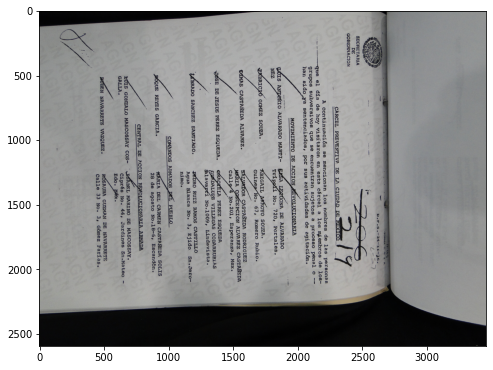

In [ ]:
print(image.shape)
# Visualizamos la imagen
plt.figure(figsize=(8,10))
plt.imshow(image)
plt.show()

## Registramos (recortamos/orientamos) el documento

[INFO] otsu's thresholding value: 87.0


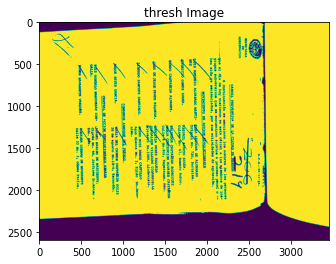

In [ ]:
# convert the warped image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,0] # cuadro chico
#gray = cv2.equalizeHist(gray) # segunda vuelta
blur = cv2.medianBlur(gray, 5)
# sharpen image
sharpen = cv2.GaussianBlur(gray, (7,7), 0)

#Get the best value for T with otsu thresholding
(T, threshInv) = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
threshInv = cv2.erode(threshInv, None, iterations=2)
threshInv = cv2.dilate(threshInv, None, iterations=2)
#threshInv = cv2.Canny(gray, 50, 100)
#ret,thresh_img = cv2.threshold(sharpen, T, 255, cv2.THRESH_BINARY_INV)

#cv2.imshow("Threshold", threshInv)

print("[INFO] otsu's thresholding value: {}".format(T))
#plt.figure(figsize=(10,12))
plt.imshow(threshInv)
plt.title("thresh Image")
plt.show()

In [ ]:
# Detectamos los perfiles del documento segmentado
profile_h = threshInv.sum(0)
profile_v = threshInv.sum(1)

eje_x = np.where(profile_h > 200000)[0]
eje_y = np.where(profile_v > 200000)[0]

if eje_x.size == 0:
    coor_x0 = 0
    coor_xf = len(profile_h)
else:
    coor_x0 = eje_x[0]
    coor_xf = eje_x[len(eje_x)-1]

if eje_y.size == 0:
    coor_y0 = 0
    coor_yf = len(profile_v)
else:
    coor_y0 = eje_y[0]
    coor_yf = eje_y[len(eje_y)-1]

image = image[coor_y0:coor_yf,coor_x0:coor_xf,:]

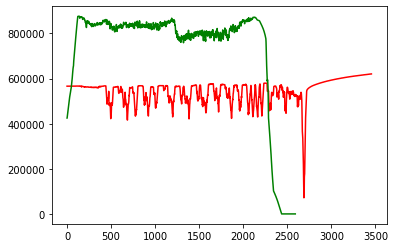

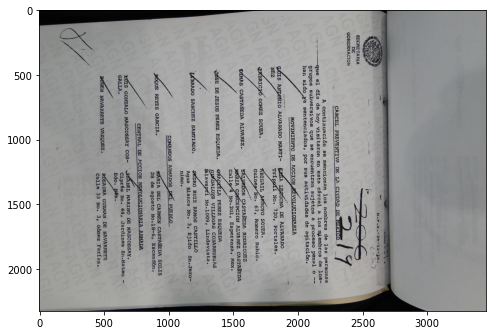

In [ ]:
plt.plot(profile_h,"r")
plt.plot(profile_v,"g")
plt.show()

plt.figure(figsize=(8,10))
plt.imshow(image)
plt.show()

## Detectamos la orientacion del documento

## Limpieza de la Imagen

In [ ]:
# convert the warped image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# sharpen image
sharpen = cv2.GaussianBlur(gray, (0,0), 3)
#sharpen = cv2.medianBlur(gray,5)
sharpen = cv2.addWeighted(gray, 1.5, sharpen, -0.5, 0)

# apply adaptive threshold to get black and white effect
thresh = cv2.adaptiveThreshold(sharpen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 71, 21) # buena 2


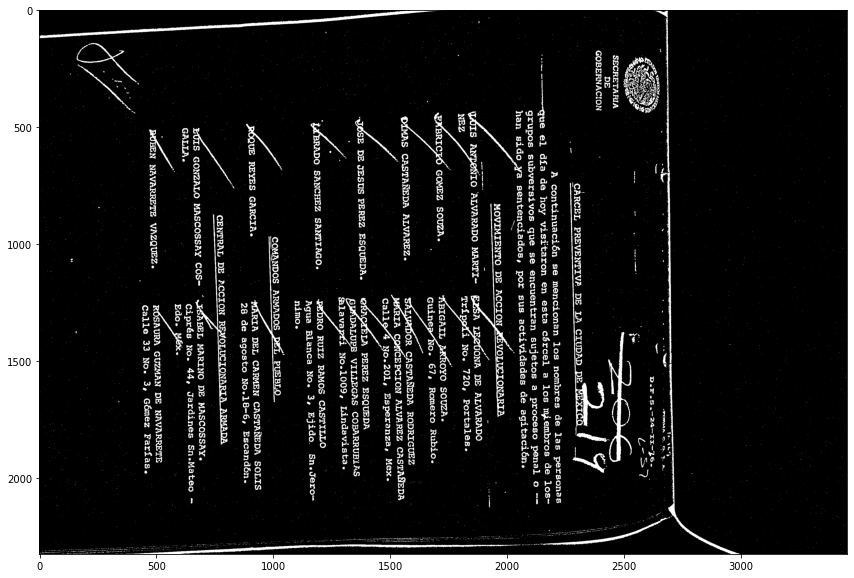

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(thresh,cmap="gray")
plt.show()

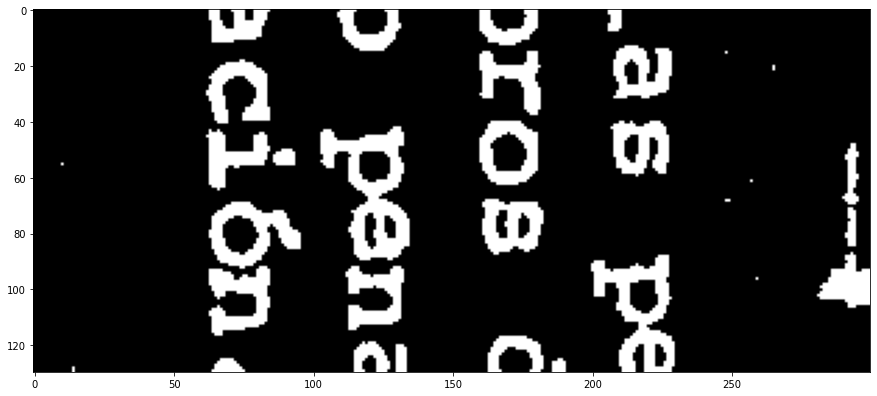

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(thresh[1820:1950,2000:2300],cmap="gray")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


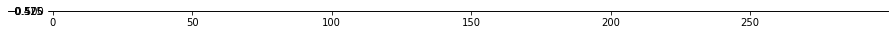

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(thresh[4000:4300,200:500],cmap="gray")
plt.show()

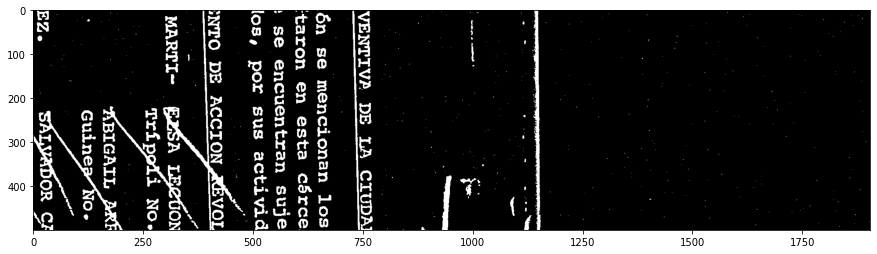

In [ ]:

# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(thresh[1000:1500,1550:],cmap="gray")
plt.show()

## Analysis of connected components

In [ ]:
label_im, nb_labels = ndimage.label(thresh)
nb_labels # how many regions?

5215

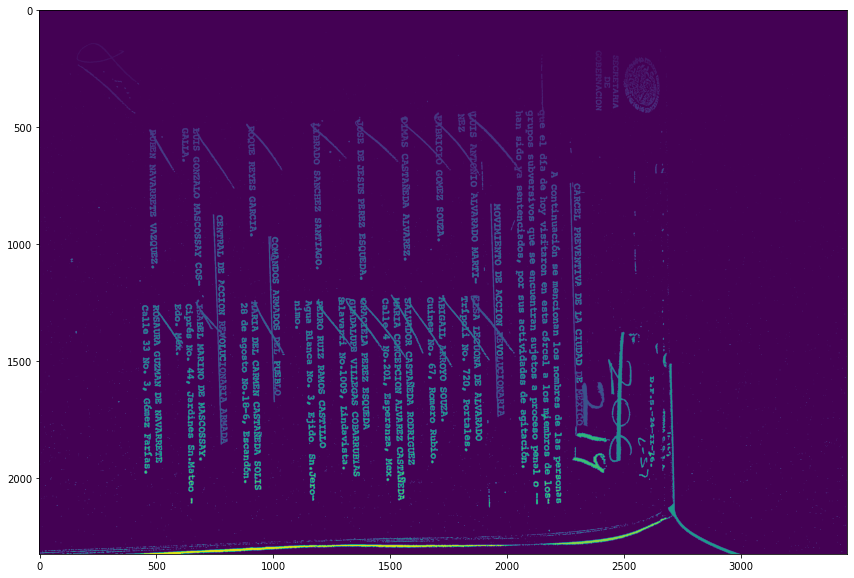

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(label_im)
plt.show()

In [ ]:
sizes = ndimage.sum(thresh, label_im, range(nb_labels + 1))

In [ ]:
#mask_size = sizes < 20000 
mask_size = sizes < 2000 #buena

remove_pixel = mask_size[label_im]
remove_pixel.shape
label_im[remove_pixel] = 0

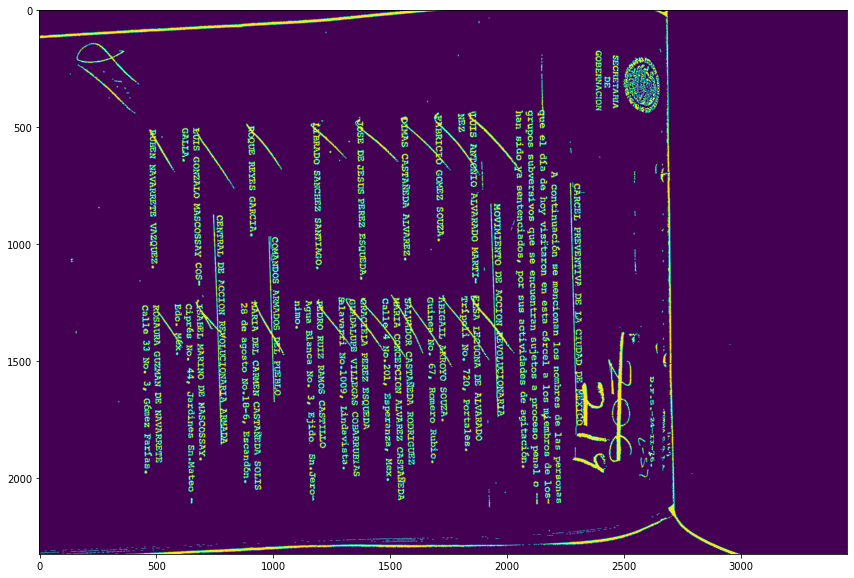

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(label_im>0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


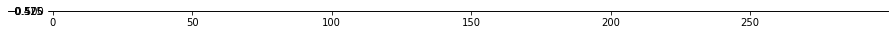

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(label_im[4000:4300,200:500]>0)
plt.show()

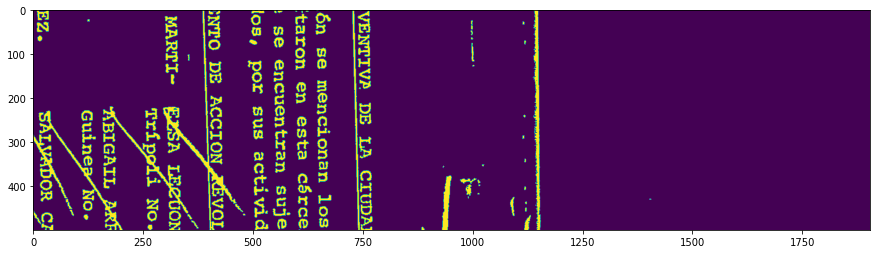

In [ ]:
# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(label_im[1000:1500,1550:]>0)
plt.show()

In [ ]:
#### ESTO  ESTABA COMENTADO ANTES
"""
element = np.ones((3,3))
dilate = cv2.dilate(np.array(label_im>0,dtype=np.uint8),element)
dilate = cv2.erode(dilate,element)

# Visualizamos la imagen
plt.figure(figsize=(15,10))
plt.imshow(dilate)
plt.show()
"""

'\nelement = np.ones((3,3))\ndilate = cv2.dilate(np.array(label_im>0,dtype=np.uint8),element)\ndilate = cv2.erode(dilate,element)\n\n# Visualizamos la imagen\nplt.figure(figsize=(15,10))\nplt.imshow(dilate)\nplt.show()\n'

## Calculamos los bounding box

In [ ]:
#label_im, nb_labels = ndimage.label(dilate)

# Calculamos las Measure region properties de cada region
props = regionprops(label_im)

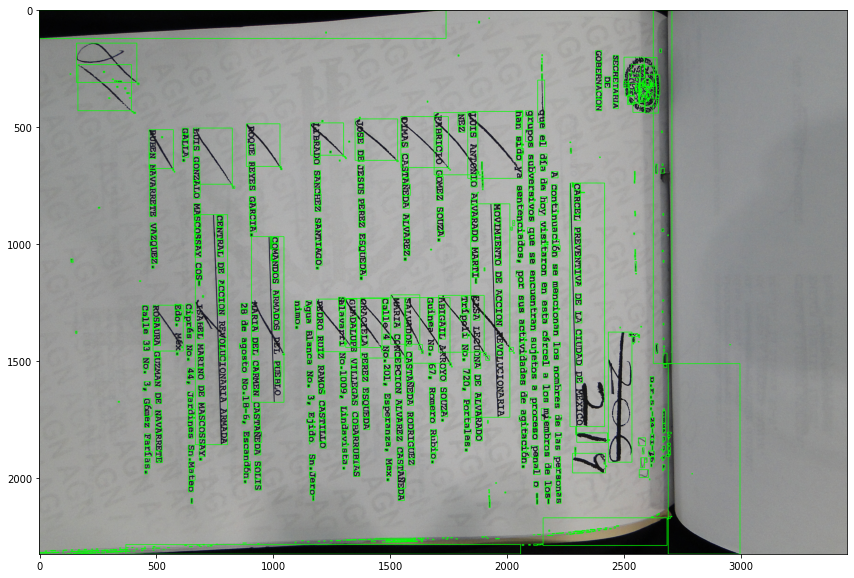

In [ ]:
image2 = image.copy()

# Recorremos cada region segmentada en la imagen
for prop in props:
    # Boundig Box
    minr, minc, maxr, maxc = prop['bbox']

    cv2.rectangle(image2, (minc, minr), (maxc, maxr), (0, 255, 0), 2)

plt.figure(figsize=(15,10))
plt.imshow(image2)
plt.show()

In [ ]:
"""
image2 = image.copy()
label = np.zeros(image.shape[:2], dtype=np.uint8)

# Recorremos cada region segmentada en la imagen
cont = 1
for prop in props:
    # Boundig Box
    minr, minc, maxr, maxc = prop['bbox']
    
    # region de interes
    roi = label[minr:maxr,minc:maxc]

    # asignamos label
    if roi.sum() == 0:
        label[minr:maxr,minc:maxc] = cont
    else:
        uni = np.unique(roi)
        # si comparte bounding box con otra region le asignamos su etiqueta
        if uni[0] != 0:
            label[minr:maxr,minc:maxc] = uni[0]
        else:
            label[minr:maxr,minc:maxc] = uni[1]
    
    cont += 1
    #cv2.rectangle(image2, (minc0, np.min([minr0, minr]) ), (maxc, np.max([maxr0,maxr]) ), (0, 255, 0), 2)

plt.figure(figsize=(15,10))
plt.imshow(label)
plt.show()
"""

"\nimage2 = image.copy()\nlabel = np.zeros(image.shape[:2], dtype=np.uint8)\n\n# Recorremos cada region segmentada en la imagen\ncont = 1\nfor prop in props:\n    # Boundig Box\n    minr, minc, maxr, maxc = prop['bbox']\n    \n    # region de interes\n    roi = label[minr:maxr,minc:maxc]\n\n    # asignamos label\n    if roi.sum() == 0:\n        label[minr:maxr,minc:maxc] = cont\n    else:\n        uni = np.unique(roi)\n        # si comparte bounding box con otra region le asignamos su etiqueta\n        if uni[0] != 0:\n            label[minr:maxr,minc:maxc] = uni[0]\n        else:\n            label[minr:maxr,minc:maxc] = uni[1]\n    \n    cont += 1\n    #cv2.rectangle(image2, (minc0, np.min([minr0, minr]) ), (maxc, np.max([maxr0,maxr]) ), (0, 255, 0), 2)\n\nplt.figure(figsize=(15,10))\nplt.imshow(label)\nplt.show()\n"

In [ ]:
#label_im2, nb_labels2 = ndimage.label(label>0)
#props = regionprops(label_im2)

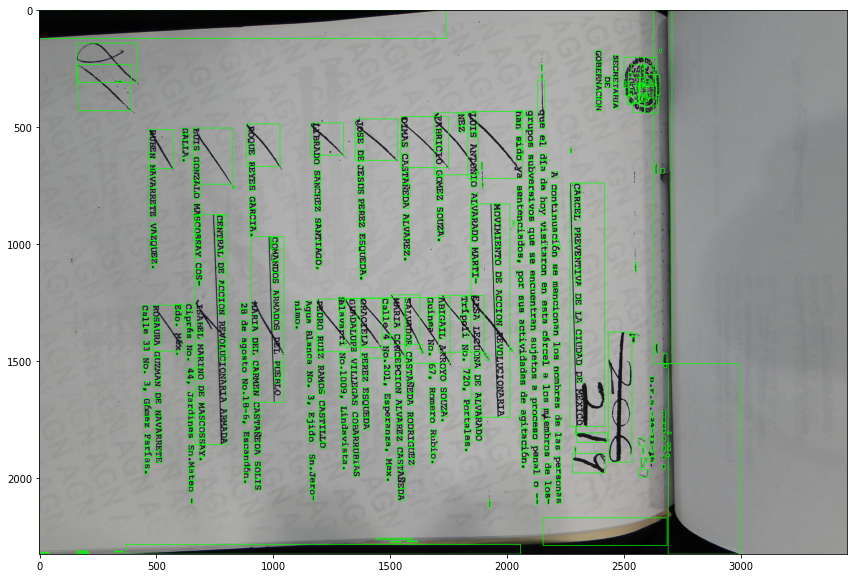

In [ ]:
image2 = image.copy()

# Recorremos cada region segmentada en la imagen
for prop in props:
    # Boundig Box
    minr, minc, maxr, maxc = prop['bbox']
    if prop['bbox_area'] < 100:
        continue
    cv2.rectangle(image2, (minc, minr), (maxc, maxr), (0, 255, 0), 2)

plt.figure(figsize=(15,10))
plt.imshow(image2)
plt.show()

## Calculamos las características con un VGG16

In [ ]:
# Cargamos el modelo con los pesos del imagenet
model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
data = []
data2 = []
data3 = []
data4 = []
data5 = []
data6 = []
label = []
# Recorremos cada region segmentada en la imagen
for prop in props:
    # Boundig Box
    minr, minc, maxr, maxc = prop['bbox']
    if prop['bbox_area'] < 100:
        continue

    a = 0 if minr-5<0 else minr-5
    b = maxr+5
    c = 0 if minc-5<0 else minc-5
    d = maxc+5

    # region de interes
    roi = image[a:b,c:d,:]
    label.append([a,b,c,d])
    dim1, dim2 =  roi.shape[:2]

    #roi = cv2.resize(roi, (93,93), interpolation = cv2.INTER_AREA)
    roi = cv2.resize(roi, (61,61), interpolation = cv2.INTER_AREA)
    
    #plt.figure(figsize=(15,10))
    #plt.imshow(roi)
    #plt.show()

    # Preprocesamos la imagen
    x = np.expand_dims(roi, axis=0)
    x = preprocess_input(x)

    # Calculamos las features
    features = model.predict(x)

    # Guardamos en modo one-hot las caracteristicas
    #data.append(features.flatten().tolist())
    data.append(features.flatten().tolist()+[dim1,dim2,prop['area']])
    #data.append(features.flatten().tolist()+[prop['area']])
    data2.append(prop['eccentricity'])
    data3.append(prop['area'])
    data4.append(prop['extent'])
    data5.append(dim1)
    data6.append(dim2)


## Analizamos las caracteristicas

In [ ]:
import pandas as pd

df = pd.DataFrame(data)
label = np.array(label)
df

0    1    2    3          4    5    ...  509       510  511   512   513    514
0    0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  1.164388  0.0   126  1745  19927
1    0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0  1515    90  12081
2    0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0   178   268   3096
3    0.0  0.0  0.0  0.0  11.854031  0.0  ...  0.0  0.000000  0.0    25    17     47
4    0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0    58    37    675
..   ...  ...  ...  ...        ...  ...  ...  ...       ...  ...   ...   ...    ...
896  0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0    14    53     68
897  0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0    13    44     51
898  0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0    12    48     65
899  0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0    11    35     47
900  0.0  0.0  0.0  0.0   0.000000  0.0  ...  0.0  0.000000  0.0    10    37     38

[901 rows x 515 columns]

In [ ]:
# Filtramos las columnas de ceros
df = df.loc[:, (df != 0).any(axis=0)]

# Eliminamos columnas constantes
df = df.loc[:, df.var(axis=0)!=0]

df.shape

(901, 495)

In [ ]:
colores = [(255,0,0),
           (0,0,255),
           (0,255,0),
           (255,255,0),
           (120,0,120),
           (255,0,255),
           (0,255,255),
           (255,120,0),
           (0,120,255),
           (120,0,255),
           (0,120,120),
           (120,120,0),
           (120,120,120),
           (255,120,120),
           (120,255,120),
           (120,120,255),
           (60,60,60),
           (120,60,60),
           (60,120,60),
           (60,60,120),
           (120,120,60),
           (60,120,120),
           (120,60,120)
          ]

len(colores)

23

## Proyeccion PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA

# Configuramos el PCA
#pca = PCA(n_components=2)
#pca = PCA(0.96)
pca = PCA(0.99)

# Proyectamos con los componentes principales
X_pca = pca.fit_transform(df)
ratio = pca.explained_variance_ratio_

In [ ]:
# Total de componentes que explican el 96% de la varianza
ratio.shape

(308,)

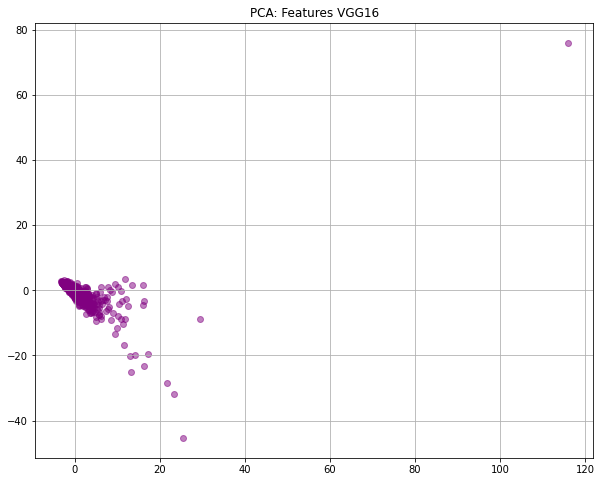

In [ ]:
# Visualizamos los datos
plt.figure(figsize=(10,8))
plt.title('PCA: Features VGG16')
plt.scatter(x = X_pca[:,0], y = X_pca[:,1], marker = 'o', color = "purple", alpha = 0.5)

plt.grid()
plt.show()

## Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [ ]:
#from sklearn.preprocessing import StandardScaler
#X_pca = StandardScaler().fit_transform(X_pca)

In [ ]:
# Clusterizamos para formar clases
kmeans = KMeans(n_clusters=26, random_state=0)
kmeans_fit = kmeans.fit(X_pca)

#kmeans = AgglomerativeClustering(n_clusters=18,distance_threshold=None,linkage="ward")
#kmeans_fit = kmeans.fit(X_pca)

print(len(set(kmeans_fit.labels_)))
kmeans_fit.labels_

26


array([ 6, 17,  5, 15, 15,  0,  5, 13,  4,  4, 15, 16,  3,  1, 13,  0,  4,
        4, 15,  4, 13, 15,  4, 13, 15, 13,  4,  4,  4,  4, 10, 13, 15,  7,
       13, 15, 13,  4, 20,  4,  4,  1, 13, 13, 13,  4, 13, 13,  4, 13, 13,
        1, 13,  4,  4, 15,  0,  3,  3,  4,  3, 10,  0,  3,  3,  1,  4, 15,
        3, 10,  0,  3,  4,  0,  3, 15,  0,  4,  4,  4, 15,  0,  0,  4, 10,
        4, 15,  0, 10,  0,  4,  0,  1,  4, 15,  1, 15,  4, 15,  1,  0,  1,
        4, 15,  9,  1, 10, 15,  4, 15,  1, 15, 15, 15,  4,  0, 23,  4, 15,
        4,  0,  2, 15,  4,  4,  4, 10,  4,  4,  4,  0,  4,  1,  0,  4,  1,
        4, 15,  8, 15,  1,  4,  1,  1,  0, 15,  0, 15,  4,  1,  0,  4,  1,
        0,  0,  1, 15,  4,  0,  0,  4,  0,  4, 15,  4, 10, 15, 10,  4,  1,
        4, 15,  1,  4, 15, 15,  8,  0,  0,  4,  4,  0,  0,  0,  4,  4,  1,
        1,  4,  4,  1,  1, 15,  1,  8,  4,  4,  1,  4,  0,  0,  4,  4,  0,
        4,  0, 15, 10,  4,  4, 15,  1,  4,  1, 15, 15,  4,  4,  4,  4, 15,
        0, 15,  1, 10, 10

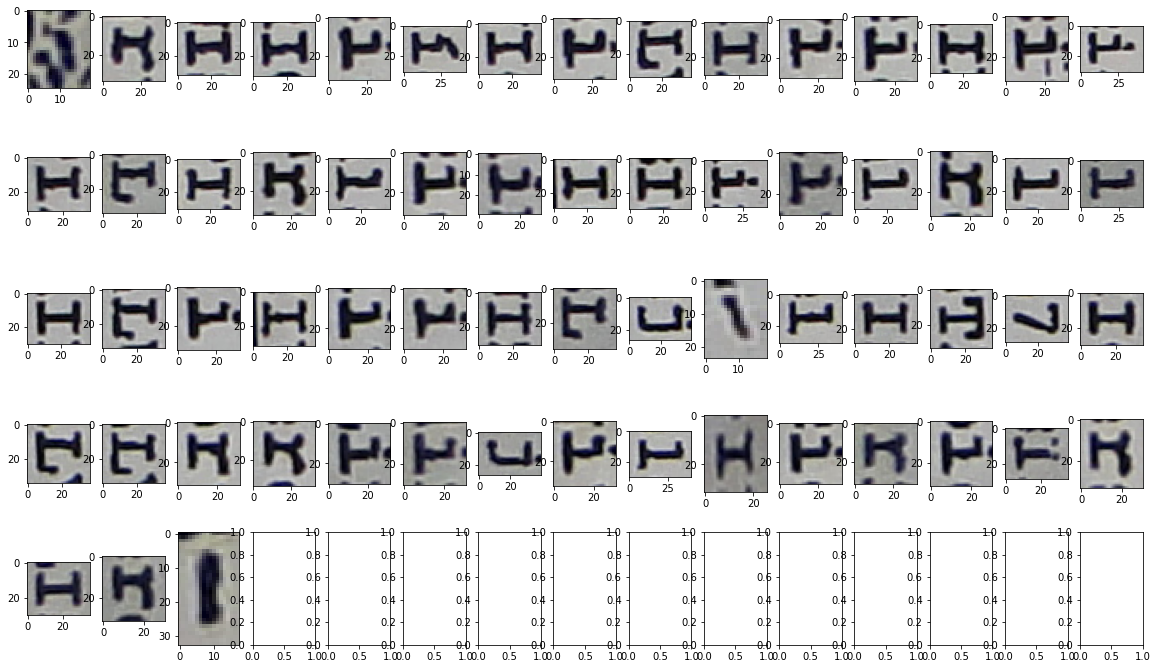

(63, 4)

In [ ]:
# Observamos los elementos del cluster
kk = 10

n = label[kmeans_fit.labels_==kk].shape[0]
fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

for i, (a,b,c,d) in enumerate(label[kmeans_fit.labels_== kk]):
    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    if int(np.ceil(n/15.0))<=1:
        axs[i%15].imshow(roi)
    else:
        axs[i//15,i%15].imshow(roi)

plt.show()

label[kmeans_fit.labels_==kk].shape

In [ ]:
import seaborn as sns
import scipy.stats as stats
from sklearn_extra.cluster import KMedoids

def show_cluster(kk, kmeans_fit, X_pca, label, image, area, extend):
    # vector de area de cada region
    area = np.array(area)[kmeans_fit.labels_==kk]
    extend = np.array(extend)[kmeans_fit.labels_==kk]
    sns.displot(area)
    sns.displot(extend)
    
    # Detectamos los outliers a partir de la desvicacion estandar
    #z_scores = stats.zscore(X_pca[kmeans_fit.labels_==kk]) # datos pca
    z_scores = stats.zscore(area) #  area
    abs_z_scores = np.abs(z_scores)
    #filtered_entries = (abs_z_scores < 4).all(axis=1)
    filtered_entries = (abs_z_scores < 3)

    z_scores = stats.zscore(extend) #  extend
    abs_z_scores = np.abs(z_scores)
    #filtered_entries = (abs_z_scores < 4).all(axis=1)
    filtered_entries = np.logical_and(filtered_entries, abs_z_scores < 3)

    # Identificamos el elemento mas cercano al centroide de cada cluster
    X = X_pca[kmeans_fit.labels_==kk]
    kmeans2 = KMedoids(n_clusters=1, random_state=0).fit(X[filtered_entries])
    ind = np.argmax((kmeans2.cluster_centers_[0,:] == X).all(axis=1))

    # Visualizamos los elementos del cluster
    n = label[kmeans_fit.labels_==kk].shape[0]
    fig, axs = plt.subplots( int(np.ceil(n/15.0)), 15, figsize=(20,12))

    for i, (a,b,c,d) in enumerate(label[kmeans_fit.labels_== kk]):
        # Visualizamos la imagen contenida en el Bounding Box
        roi = image[a:b,c:d,:]

        # Identificamos a los outliers
        cmap = 'viridis'
        if not filtered_entries[i]:
            roi = roi[:,:,0]

        # Identificamos al representante del cluster
        if i==ind:
            roi = roi[:,:,0]
            cmap = 'jet'

        # Mostramos los elememntos del cluster
        if int(np.ceil(n/15.0))<=1:
            axs[i%15].imshow(roi,cmap=cmap)
        else:
            axs[i//15,i%15].imshow(roi,cmap=cmap)

    plt.show()

    print(label[kmeans_fit.labels_==kk].shape)


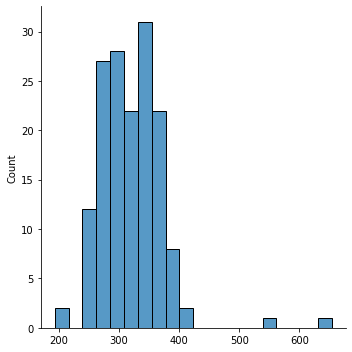

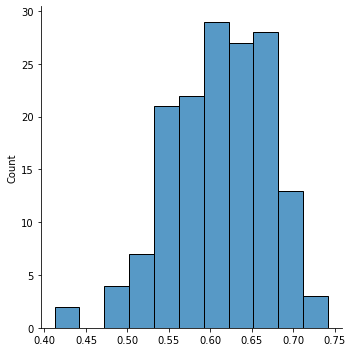

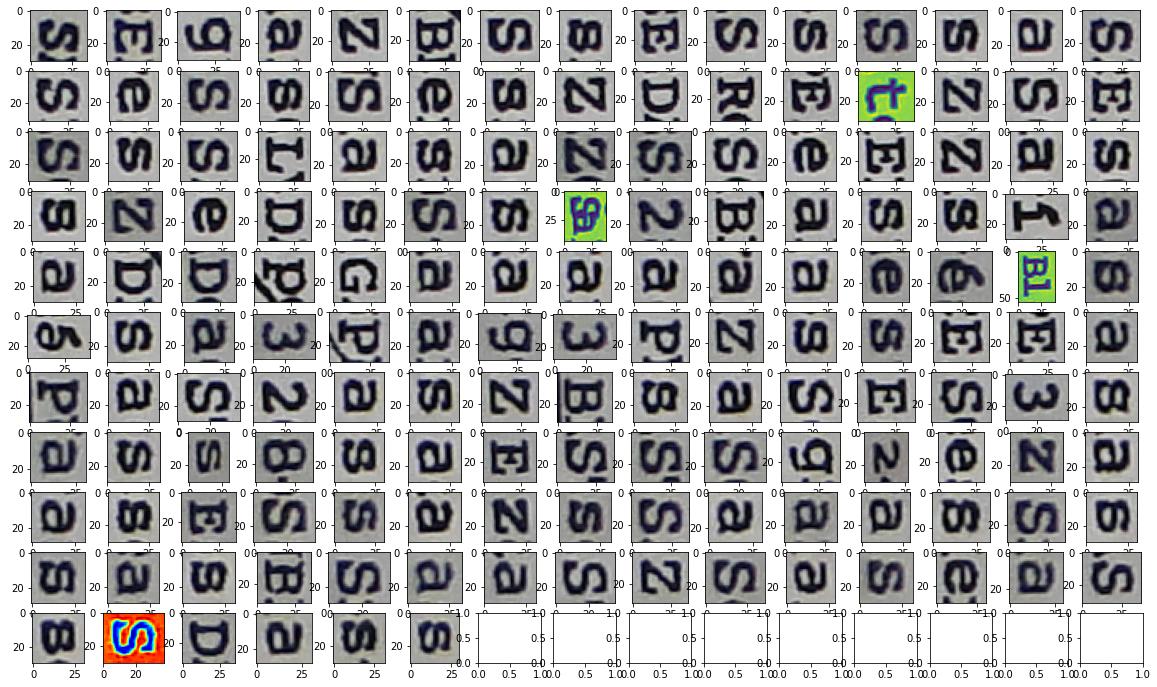

(156, 4)


In [ ]:
kk = 0
show_cluster(kk, kmeans_fit, X_pca, label, image, data3, data4)

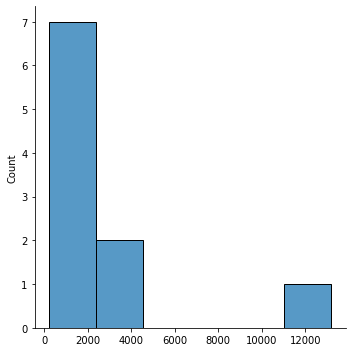

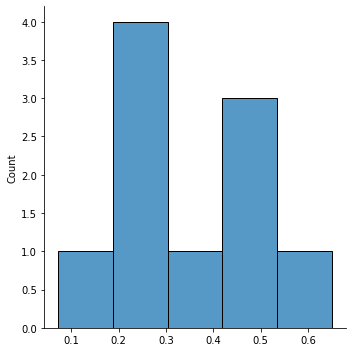

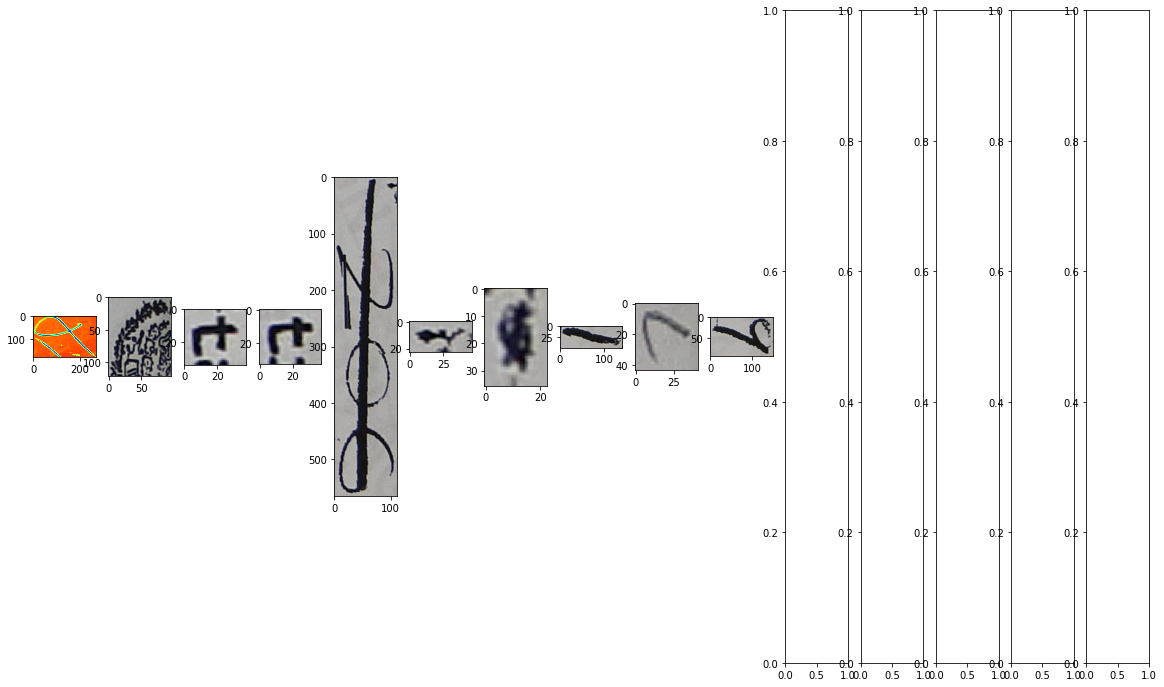

(10, 4)


In [ ]:
kk = 5
show_cluster(kk, kmeans_fit, X_pca, label, image, data3, data4)

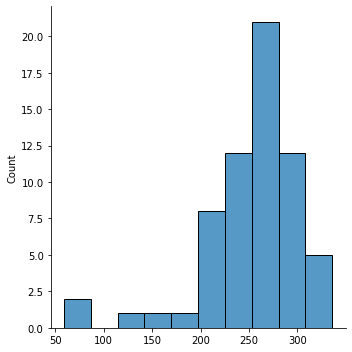

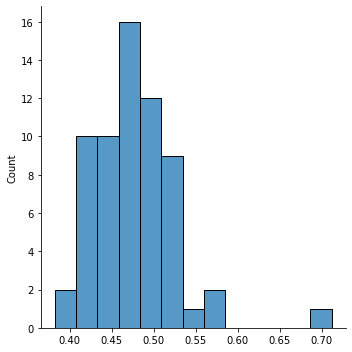

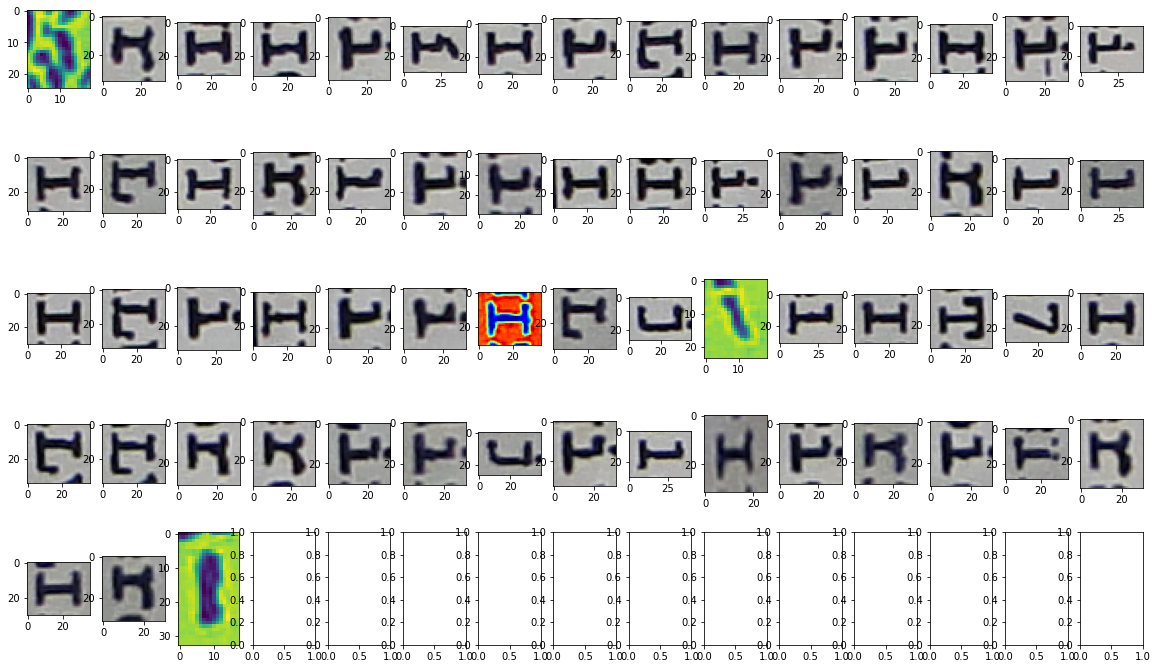

(63, 4)


In [ ]:
kk = 10
show_cluster(kk, kmeans_fit, X_pca, label, image, data3, data4)

In [ ]:
"""
kk = 3
extend = np.array(data4)[kmeans_fit.labels_==kk]
sns.displot(extend)

n = label[kmeans_fit.labels_==kk].shape[0]

for i, (a,b,c,d) in enumerate(label[kmeans_fit.labels_== kk]):
    # Visualizamos la imagen contenida en el Bounding Box
    roi = image[a:b,c:d,:]

    #if extend[i] > 0.3:filtered_entries
    if not filtered_entries[i]:
        #continue
        plt.imshow(roi)
        plt.show()

label[kmeans_fit.labels_==kk].shape
"""

'\nkk = 3\nextend = np.array(data4)[kmeans_fit.labels_==kk]\nsns.displot(extend)\n\nn = label[kmeans_fit.labels_==kk].shape[0]\n\nfor i, (a,b,c,d) in enumerate(label[kmeans_fit.labels_== kk]):\n    # Visualizamos la imagen contenida en el Bounding Box\n    roi = image[a:b,c:d,:]\n\n    #if extend[i] > 0.3:filtered_entries\n    if not filtered_entries[i]:\n        #continue\n        plt.imshow(roi)\n        plt.show()\n\nlabel[kmeans_fit.labels_==kk].shape\n'

## Visualizamos los resultados de la clusterización en la Imagen
Un color diferente para cada cluster.

In [ ]:
import scipy.stats as stats
from sklearn_extra.cluster import KMedoids

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


10

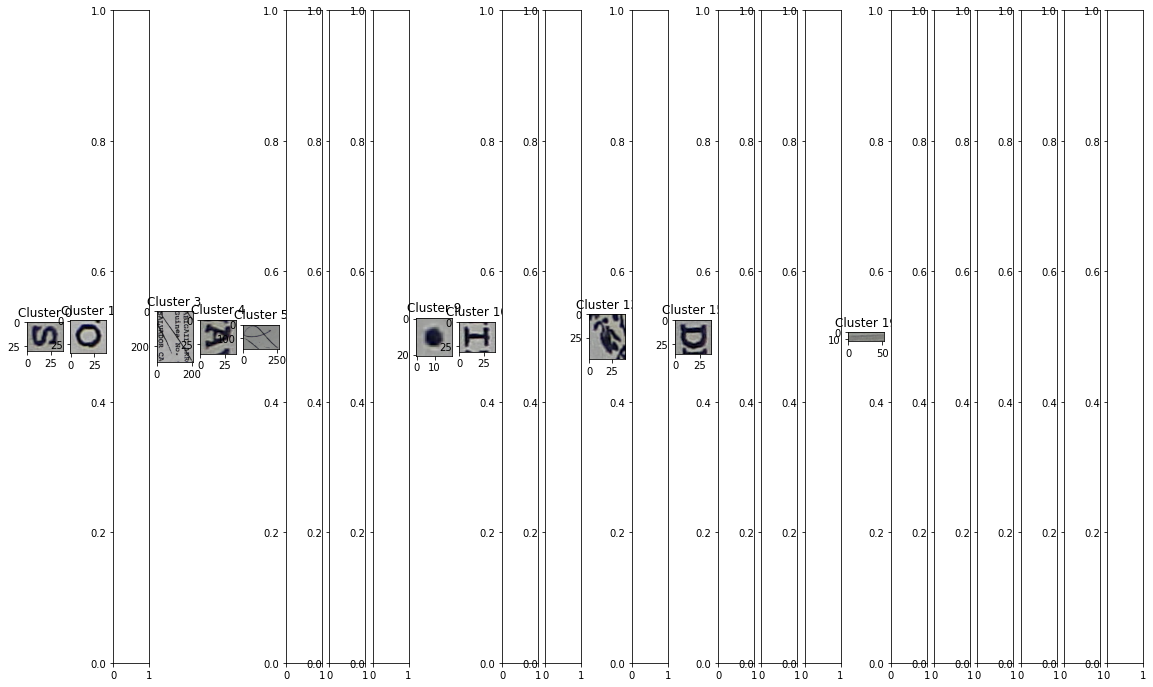

In [ ]:
fig, axs = plt.subplots( 1, len(set(kmeans_fit.labels_)), figsize=(20,12) )

clusters_box = []
# Recorremos cada cluster
for kk in np.unique(kmeans_fit.labels_):

    # detect outliers
    area = np.array(data3)[kmeans_fit.labels_==kk]
    extend = np.array(data4)[kmeans_fit.labels_==kk]
    #z_scores = stats.zscore(X_pca[kmeans_fit.labels_==kk])
    z_scores = stats.zscore(area)
    abs_z_scores = np.abs(z_scores)
    #filtered_entries = (abs_z_scores < 4).all(axis=1)
    filtered_entries = (abs_z_scores < 3)

    z_scores = stats.zscore(extend) #  extend
    abs_z_scores = np.abs(z_scores)
    filtered_entries = np.logical_and(filtered_entries, abs_z_scores < 3)

    if area.shape[0] <=3:
        continue

    # represents for clusters
    X = X_pca[kmeans_fit.labels_==kk]
    cluster = KMedoids(n_clusters=1, random_state=0).fit(X[filtered_entries])
    ind = np.argmax((cluster.cluster_centers_[0,:] == X).all(axis=1))

    # Recorremos cada region segmentada en la imagen
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    for i, (a,b,c,d) in enumerate(label[kmeans_fit.labels_== kk]):
        if not filtered_entries[i]:
            continue

        if i==ind:
            roi = image[a:b,c:d,:]
            axs[kk].imshow(roi)
            axs[kk].title.set_text('Cluster '+str(kk))


        mask[a:b,c:d] = 255
    #plt.imshow(mask)
    #plt.show()
    
    # Generamos los nuevos bounding box
    label_im2, nb_labels2 = ndimage.label(mask)
    props = regionprops(label_im2)
    clusters_box.append([ (prop['bbox'][0],prop['bbox'][2],prop['bbox'][1],prop['bbox'][3]) for prop in props ])

fig.show()
len(clusters_box)


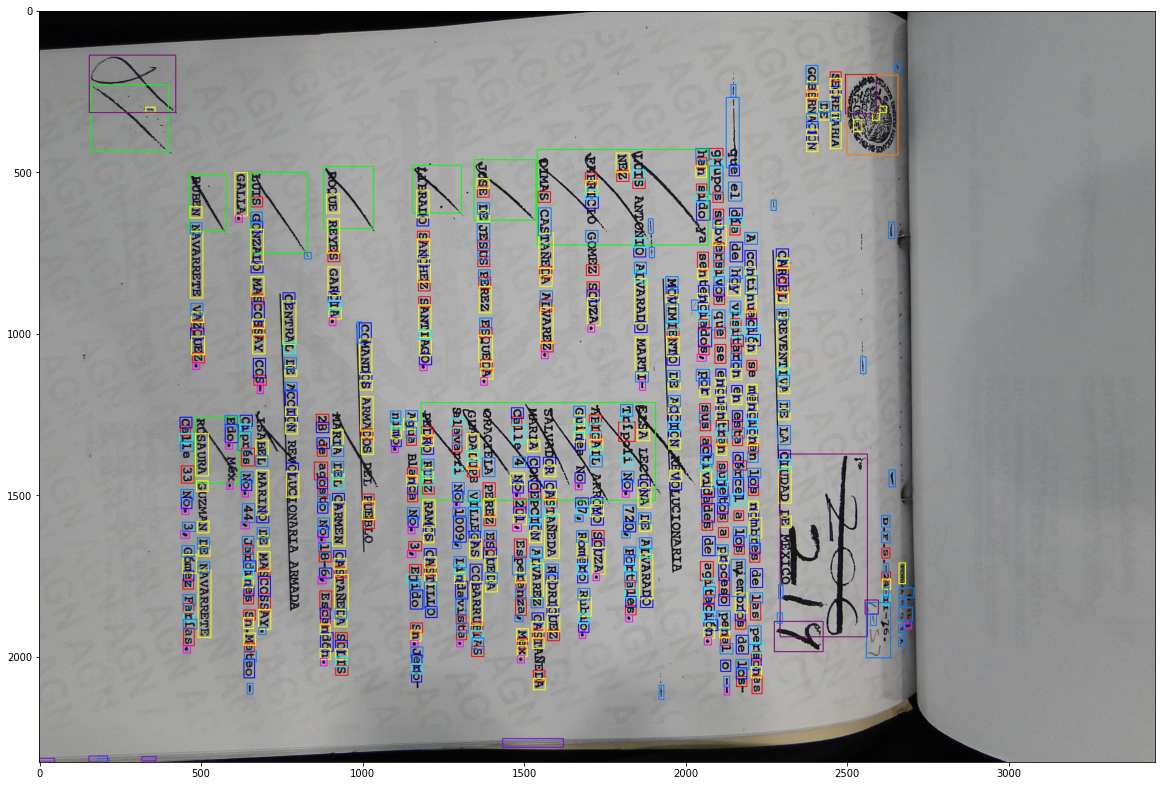

In [ ]:
image2 = image.copy()

# Recorremos cada cluster
for kki, cluster_kk in enumerate(clusters_box):
    # Recorremos cada region segmentada en la imagen
    for i, (a,b,c,d) in enumerate(cluster_kk):

        cv2.rectangle(image2, (c, a), (d, b), colores[kki], 2)
plt.show()

plt.figure(figsize=(20,15))
plt.imshow(image2)
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


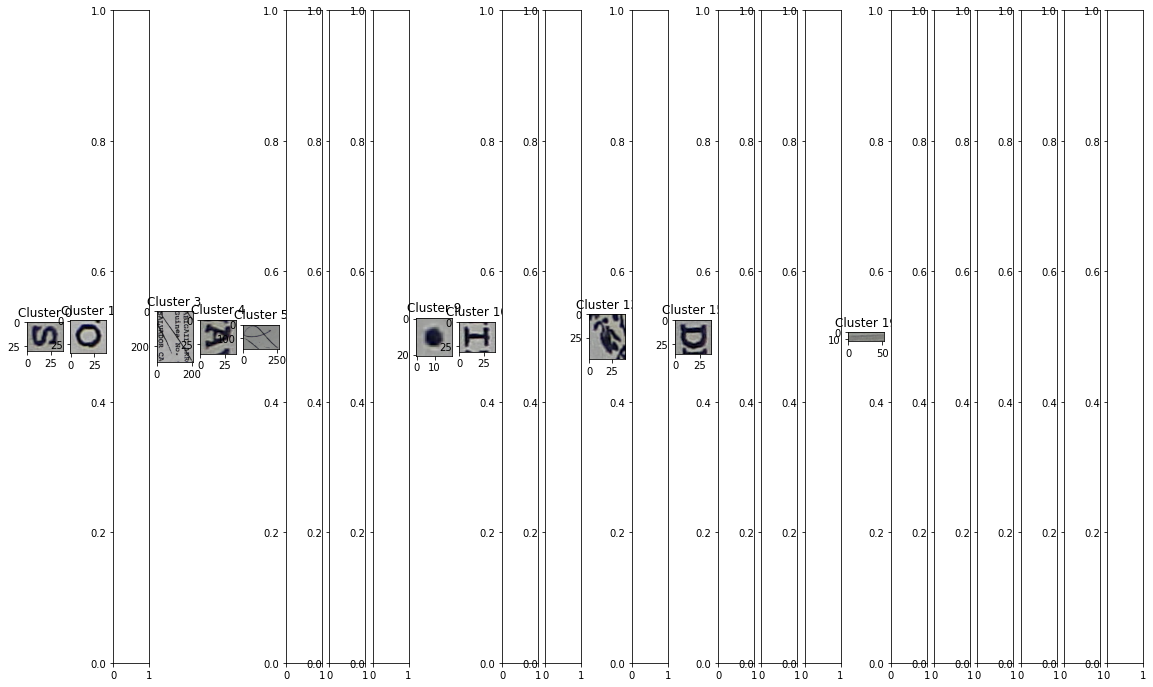

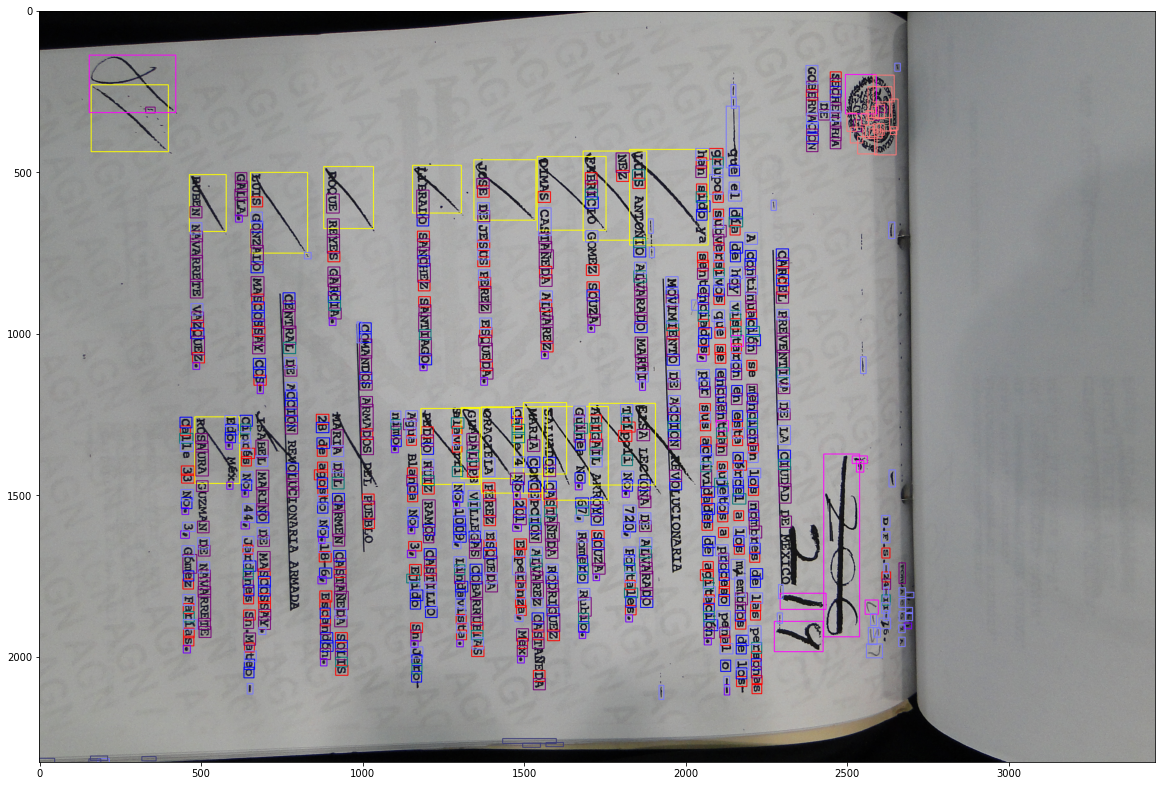

In [ ]:
image2 = image.copy()

fig, axs = plt.subplots( 1, len(set(kmeans_fit.labels_)), figsize=(20,12) )
# Recorremos cada cluster
for kk in np.unique(kmeans_fit.labels_):

    # detect outliers
    area = np.array(data3)[kmeans_fit.labels_==kk]
    #z_scores = stats.zscore(X_pca[kmeans_fit.labels_==kk])
    z_scores = stats.zscore(area)
    abs_z_scores = np.abs(z_scores)
    #filtered_entries = (abs_z_scores < 4).all(axis=1)
    filtered_entries = (abs_z_scores < 3)

    extend = np.array(data4)[kmeans_fit.labels_==kk]
    z_scores = stats.zscore(extend) #  extend
    abs_z_scores = np.abs(z_scores)
    filtered_entries = np.logical_and(filtered_entries, abs_z_scores < 3)

    if area.shape[0] <=3: # Eliminamos grupos con 3 o menos elementos
        continue

    # represents for clusters
    X = X_pca[kmeans_fit.labels_==kk]
    cluster = KMedoids(n_clusters=1, random_state=0).fit(X[filtered_entries])
    ind = np.argmax((cluster.cluster_centers_[0,:] == X).all(axis=1))

    # Recorremos cada region segmentada en la imagen
    for i, (a,b,c,d) in enumerate(label[kmeans_fit.labels_== kk]):
        if not filtered_entries[i]:
            continue

        if i==ind:
            roi = image[a:b,c:d,:]
            axs[kk].imshow(roi)
            axs[kk].title.set_text('Cluster '+str(kk))

        cv2.rectangle(image2, (c, a), (d, b), colores[kk], 2)
plt.show()

plt.figure(figsize=(20,15))
plt.imshow(image2)
plt.show()

## Metricas para evaluar clustering

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator  #Librería para calcular el punto de codo de curva
from sklearn import metrics

In [ ]:
#Total Within Cluster Sum of Squares
def calculateWCSS(X,labels):
  twss = 0
  for l in np.unique(labels):
    Xl = X.iloc[labels == l,:]
    m = np.mean(Xl)
    Xq = Xl - m
    Xq2 = Xq*Xq
    s = np.sum(np.sum(Xq2))
    twss = twss + s
  return(twss)

In [ ]:
X_pca = pd.DataFrame(X_pca)

#Rango de grupos
GRange = np.arange(2,101)
#GRange = np.arange(2,21)

#Para guardar los resultados de las métricas
WCSS = []
Silhouette = []
RandIndex = []
AMI = []
Homogeneity = []
Completeness = []
FowlesMallows = []
CalinskiHarabasz = []
DaviesBouldin = []

#Guardar Etiquetas
labelsK = []

for k in GRange:
  #Generamos un agrupamiento con k grupos
##  clustering = AgglomerativeClustering(n_clusters=k,distance_threshold=None,linkage="ward").fit(X_pca)
  clustering = KMeans(n_clusters=k, random_state=0).fit(X_pca)

  #Obtenemos las etiquetas
  labels = clustering.labels_

  #Calculamos las métricas, no todas funcionan con k=1
  wcss = calculateWCSS(X_pca,labels)
  if k>1:
    s = metrics.silhouette_score(X_pca, labels, metric='euclidean')
    ch = metrics.calinski_harabasz_score(X_pca, labels)
    db = metrics.davies_bouldin_score(X_pca, labels)
  else:
    s = 0
    ch = 0
    db = 0
  #ri = metrics.adjusted_rand_score(ClaseTf,labels)
  #ami = metrics.adjusted_mutual_info_score(ClaseTf,labels)
  #hg = metrics.homogeneity_score(ClaseTf,labels)
  #cs = metrics.completeness_score(ClaseTf,labels)
  #fm = metrics.fowlkes_mallows_score(ClaseTf,labels)
  
  #print(str(k) + ": " + str(wcss) + " " + str(s) + " " + str(hg))

  #Concatenamos las métricas 
  WCSS.append(wcss)
  Silhouette.append(s)
  #RandIndex.append(ri)
  #AMI.append(ami)
  #Homogeneity.append(hg)
  #Completeness.append(cs)
  #FowlesMallows.append(fm)
  CalinskiHarabasz.append(ch)
  DaviesBouldin.append(db)

  #gnames = generarNombresGrupos(labels,ClaseTf)
  labelsK.append(labels)


In [ ]:
#WCSS

print("WCSS: Mide la dispersión de los grupos con la suma de cuadrados.")
metrc = WCSS
k = KneeLocator(GRange, metrc, S=1.0, curve="convex", direction="decreasing")
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRange,metrc)
plt.plot([k.elbow,k.elbow],[min(metrc),max(metrc)],'--')
plt.title("Within Cluster Sum of Squares")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
print(metrc)
print(k.elbow)
plt.text(k.elbow+1,min(metrc) + 0.5*np.ptp(metrc),str(k.elbow) + " grupos")
plt.show()
#fig1.savefig(PATH + "/met_wcss.png")

#Calinski-Harabasz
print("Calinski-Harabasz: Mide si los grupos están bien definidos con sum of between-clusters dispersion and of within-cluster dispersion for all clusters.")
metrc = CalinskiHarabasz
GRanges = GRange
k = KneeLocator(GRanges, metrc, S=1.0, curve="convex", direction="decreasing")
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRanges,metrc)
plt.plot([k.elbow,k.elbow],[min(metrc),max(metrc)],'--')
plt.title("Calinski-Harabasz")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k.elbow,min(metrc) + 0.5*np.ptp(metrc),str(k.elbow) + " grupos")
plt.show()
#fig1.savefig(PATH + "/met_calisnkiharabasz.png")

#Silhouette
print("Silhouette: Mide si los grupos están bien definidos con base en la distancia a los elementos de la misma clase y del grupo más cercano.")
metrc = Silhouette
GRanges = GRange
k = GRanges[np.argmax(metrc)]
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRanges,metrc)
plt.plot([k,k],[min(metrc),max(metrc)],'--')
plt.title("Silhouette")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k,min(metrc) + 0.5*np.ptp(metrc),str(k) + " grupos")
plt.show()
#fig1.savefig(PATH + "/met_silohuette.png")

#DaviesBouldin
print("Davies-Bouldin: Mide la separación entre grupos, considerando la distancia entre los grupos y su tamaño.")
metrc = DaviesBouldin
GRanges = GRange
k = GRanges[np.argmax(metrc)]
fig1 = plt.figure(1, figsize=(8, 6))
plt.plot(GRanges,metrc)
plt.plot([k,k],[min(metrc),max(metrc)],'--')
plt.title("Davies Bouldin")
plt.xlabel("Número de Grupos")
plt.ylabel("Valor de la Métrica")
plt.text(k,min(metrc) + 0.5*np.ptp(metrc),str(k) + " grupos")
plt.show()
#fig1.savefig(PATH + "/met_daviesbouldin.png")